<a href="https://colab.research.google.com/github/AkothCarole/KNN-and-Naives-Bayes/blob/master/Week_9_IP_Caroline_Akoth_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

1. Download the two datasets from the given links:

Dataset 1 Source: [Train Dataset Source: Link (Links to an external site.), Test Dataset Source: Link (Links to an external site.)]

Dataset 2 Source: [Link (Links to an external site.)]
2. Randomly partition each dataset into two parts i.e 80 - 20  sets.

3. For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

4. For dataset 2, perform classification of the testing set samples using the Naive Bayes Classifier.
5. Compute the accuracy (percentage of correct classification).
6. Report the confusion matrix of each classifier.
7. Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.
8. Suggest and apply at least one of the optimization techniques that you learned earlier this week.
9. Provide further recommendations to improve both classifiers.

***b) Defining the Metric for Success***

To successfully use KNN classifiers 

**c) Understanding the context**

The question requires us to use KNN to classfify which passenger survived and those that didnt in the titanic dataset provided. 

**KNN - K- Nearest Neighbors** is a supervised machine learning algorithm used of classification of data based on the distance between the train dataset and the test variable. 

**d) Recording the Experimental Design**

**e) Data Relevance**

The dataset provided is relevant as it contain most required variables.

## 2. Reading the Data

In [76]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
# Loading the Data from the source i.e. csv
train=pd.read_csv('train_ip.csv')
test=pd.read_csv('test_ip.csv')
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S




## 3. Checking the Data

In [131]:
# Determining the no. of records in our dataset
print(train.shape)
test.shape

(891, 12)


(418, 11)

In [132]:
# Previewing the bottom of our dataset
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [133]:
#Preview bottom of test
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [134]:
# Checking whether each column has an appropriate datatype
print(train.dtypes)
print ("**********************************")
print(test.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
**********************************
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [15]:
#Check and define columns
print(train.columns)
print("*************************************")
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
*************************************
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Columns definition

1. passenger ID - This is the serial ID of a specific passenger

2. Survived - A categorical variable of those who survived amd those who did not survive. , 1- Survived , 2- Did not Survive.

3.  Pclass - The passenger class in the Titanic Ship (classes 1,2,3)

4.  Name - Full Name of the Passenger

5.  sex - The gender of the passengers, either Female or male.

6.  Sibsp - Number of Siblings or spouses aboard in the titanic

7. Parch -Number of Parents of children abard in the titanic.

8. Ticket - Ticket Number

9.  Cabin - Cabin Number

10. Embarked - Port of Embarkation (C- Cherbourg , Q - QueensTown , S - Southampton)

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

 Ourtliers:
 [[], [], [], [66.0, 65.0, 71.0, 70.5, 65.0, 65.0, 71.0, 80.0, 70.0, 70.0, 74.0], [3.0, 4.0, 3.0, 3.0, 4.0, 5.0, 3.0, 4.0, 5.0, 3.0, 3.0, 4.0, 8.0, 4.0, 4.0, 3.0, 8.0, 4.0, 8.0, 3.0, 4.0, 4.0, 4.0, 4.0, 8.0, 3.0, 3.0, 5.0, 3.0, 5.0, 3.0, 4.0, 4.0, 3.0, 3.0, 5.0, 4.0, 3.0, 4.0, 8.0, 4.0, 3.0, 4.0, 8.0, 4.0, 8.0], [1.0, 2.0, 1.0, 5.0, 1.0, 1.0, 5.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0

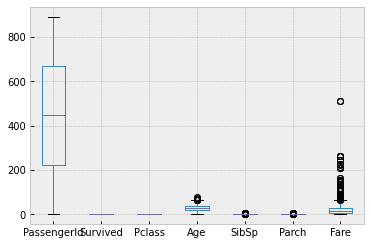

In [27]:
# Checking for Outliers for numerical columns
#
numerical = train[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']]

plt.style.use('bmh')

# plotting outliers for the numeric columns

_t, cols = pd.DataFrame.boxplot(numerical, return_type='both')

outliers = [flier.get_ydata() for flier in cols['fliers']]
out_list = [i.tolist() for i in outliers]

print(f" Ourtliers:\n {out_list}")

#fare and age has alot of outliers


In [47]:
#Method 2 outliers

def detect_outlier(train):
    outliers=[]
    threshold=3
    mean_1 = np.mean(train)
    std_1 =np.std(train)
    
    for y in train:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [80]:
# Counting number of outliers in our data columns and cheking the percentage for each column using z-score
#
for col in train:
    rows, columns = train.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(train[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

PassengerId has 0 outliers in total, which is 0.0% of data
Survived has 0 outliers in total, which is 0.0% of data
Pclass has 0 outliers in total, which is 0.0% of data


TypeError: ignored

In [81]:
# Checking for Anomalies
print(train.nunique())
print ("**************************")
print(test.nunique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64
**************************
PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64


In [82]:
# Identifying the Missing Data
print(train.isnull().sum())
print("*****************************************")
print(test.isnull().sum())

#Age column has 177 nulls while cabin has 687 in the train dataset
#Age column has 86 nulls while cabin has 327 in the train dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
*****************************************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [83]:
train.shape

(891, 12)

In [84]:
test.shape

(418, 11)

In [ ]:
# Dealing with the Missing Data
#train.dropna()

# Conclusion we cant drop 687 entries 

In [85]:
train.describe()
    

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
#Replace the null values with the mean of the age column
#For test and train datasets
test['Age']=test['Age'].fillna((test['Age'].mean))
train['Age']=train['Age'].fillna((train['Age'].mean))


In [88]:
#Check missing data again
print(train.isnull().sum())
print("*****************************************")
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
*****************************************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [136]:
# More data cleaning procedures
# Encode the categorical fields sex, embarked
#Create a list of all columns to convert to integers
col= ['Sex']

# We will use Lable encoder to convert our numerical values to integers
#import Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#iterate through the dataset train dataset
for a, b in enumerate(col):
  train[b] = le.fit_transform(train[b])

#iterate through the dataset test dataset.
for a, b in enumerate(col):
 test[b] = le.fit_transform(test[b])

In [137]:
#Create a list of all columns to convert to integers
col= ['Embarked']

# We will use Lable encoder to convert our numerical values to integers
#import Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#iterate through the dataset train dataset
for c, d in enumerate(col):
  train[d] = le.fit_transform(train[d])

#iterate through the dataset test dataset.
for c, d in enumerate(col):
 test[d] = le.fit_transform(test[d])

TypeError: ignored

In [ ]:
"""#Create a list of all columns to convert to integers
#col= ['Age']

# We will use Lable encoder to convert our numerical values to integers
#import Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#iterate through the dataset train
for i, j in enumerate(col):
  train[j] = le.fit_transform(train[j])

#iterate through the dataset titanic_test.
for i, j in enumerate(col):
  test[j] = le.fit_transform(test[j])"""


In [95]:
#Deal with missing data in embarked column
print(train['Embarked'].unique())

print(test['Embarked'].unique())

['S' 'C' 'Q' nan]
['Q' 'S' 'C']


In [138]:
# Checking whether each column has an appropriate datatype
print(train.dtypes)
print ("**********************************")
print(test.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
**********************************
PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## 6. Exploratory Analysis

In [97]:
# Ploting the bivariate summaries and recording our observations
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


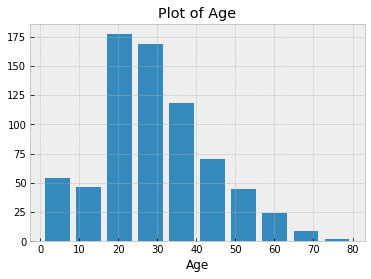

In [139]:
#PLot of columns
plt.hist(train['Age'],bins = 10, histtype='bar',rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('')
plt.title('Plot of Age')
plt.show()

ValueError: ignored

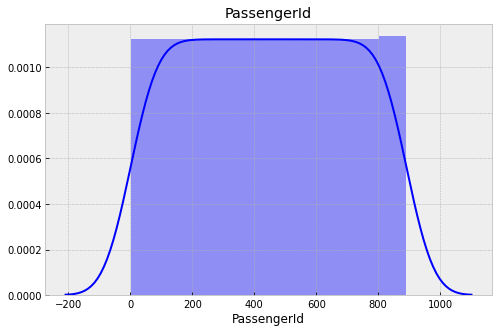

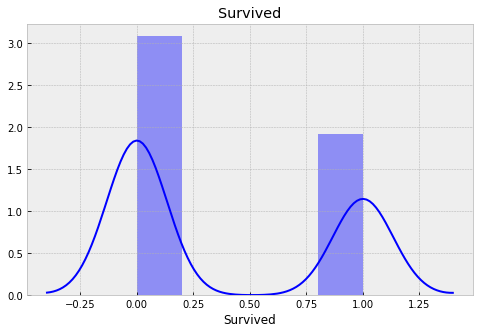

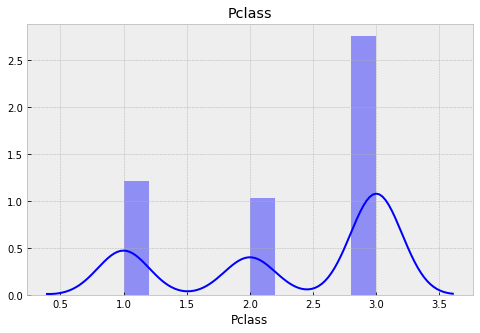

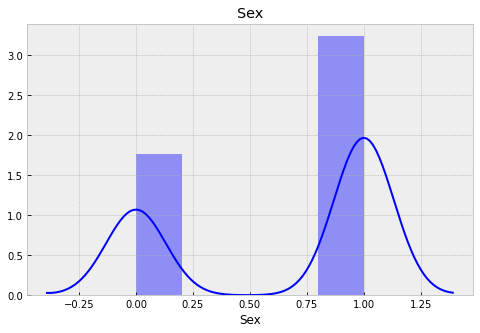

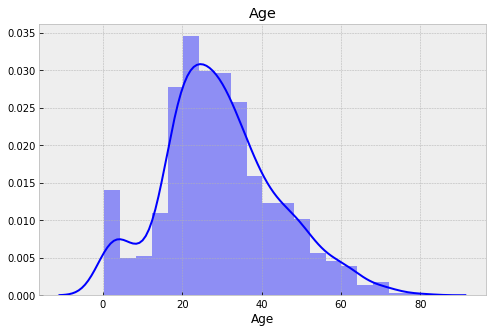

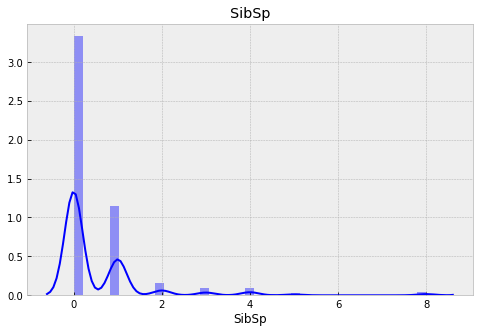

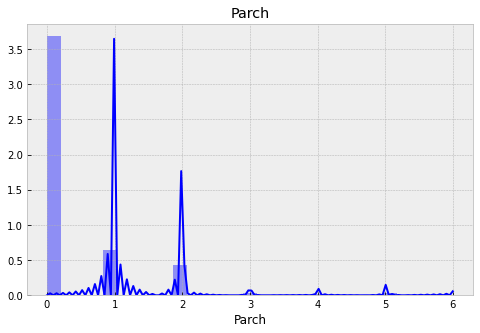

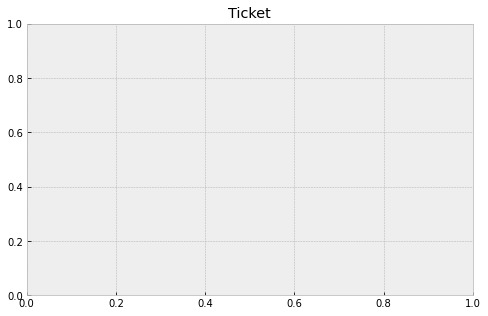

In [140]:
col = train.columns
col = col.drop(['Name'])
for a, b in enumerate(col):
  plt.figure(figsize=(8, 5))
  plt.title(b)
  sns.distplot(train[b], color='blue', norm_hist=True)

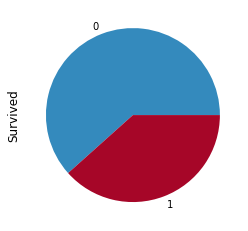

In [60]:
#Plot of passanger who died vs those who survived
#This is a pie chart representation of the people who survived and died
%matplotlib inline

alpha_color = 0.5
survived =train['Survived'].value_counts()* 100/ len(train)
survived
survived.plot(kind = 'pie')


In [65]:
#Correlation matris for the variables

corr =train.corr()
corr

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,-0.057527,-0.001652,0.012658,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.035144,-0.338481,1.000000,0.131900,0.083081,0.018443,-0.549500,0.131900
Sex,0.042939,-0.543351,0.131900,1.000000,-0.114631,-0.245489,-0.182333,1.000000
SibSp,-0.057527,-0.035322,0.083081,-0.114631,1.000000,0.414838,0.159651,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.245489,0.414838,1.000000,0.216225,-0.245489
Fare,0.012658,0.257307,-0.549500,-0.182333,0.159651,0.216225,1.000000,-0.182333
Embarked,0.042939,-0.543351,0.131900,1.000000,-0.114631,-0.245489,-0.182333,1.000000


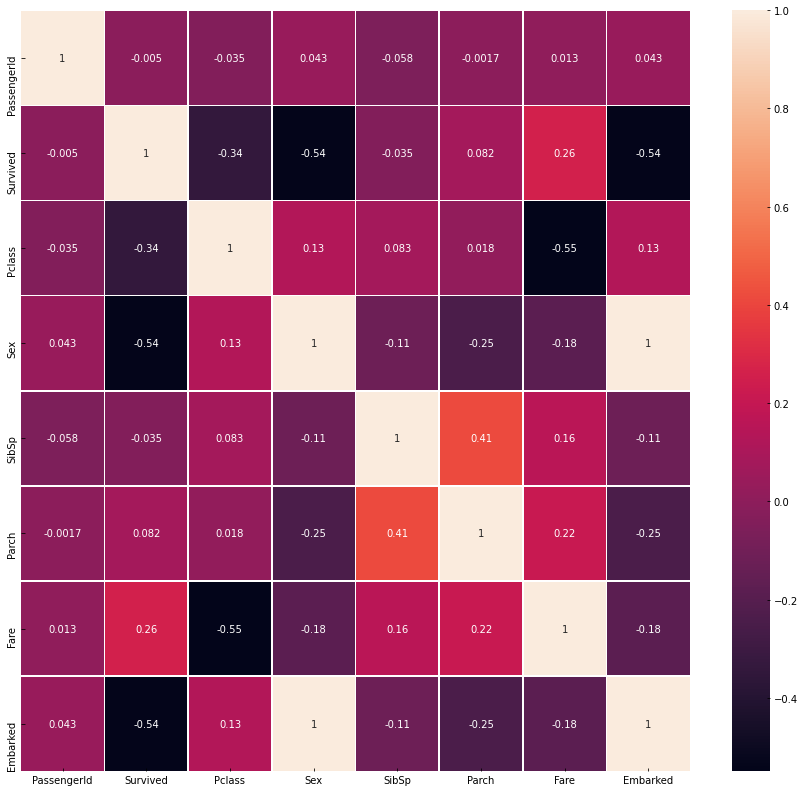

In [99]:
#Plot correlation matrix
fig, ax = plt.subplots(figsize=(15,14)) 
sns.heatmap(corr, annot=True,  linewidths=.5, ax=ax)


In [144]:
#drop passenger ID,name ,cabin and Ticket as they have the least correlation and we dont need it
train = train.drop(columns =['PassengerId','Name','Ticket','Cabin'])
#train = train.drop(columns =['Cabin'])
train.shape

(891, 8)

In [145]:
#Drop from the training set as well

test = test.drop(columns =['PassengerId','Name','Ticket','Cabin'])
test.shape

(418, 7)

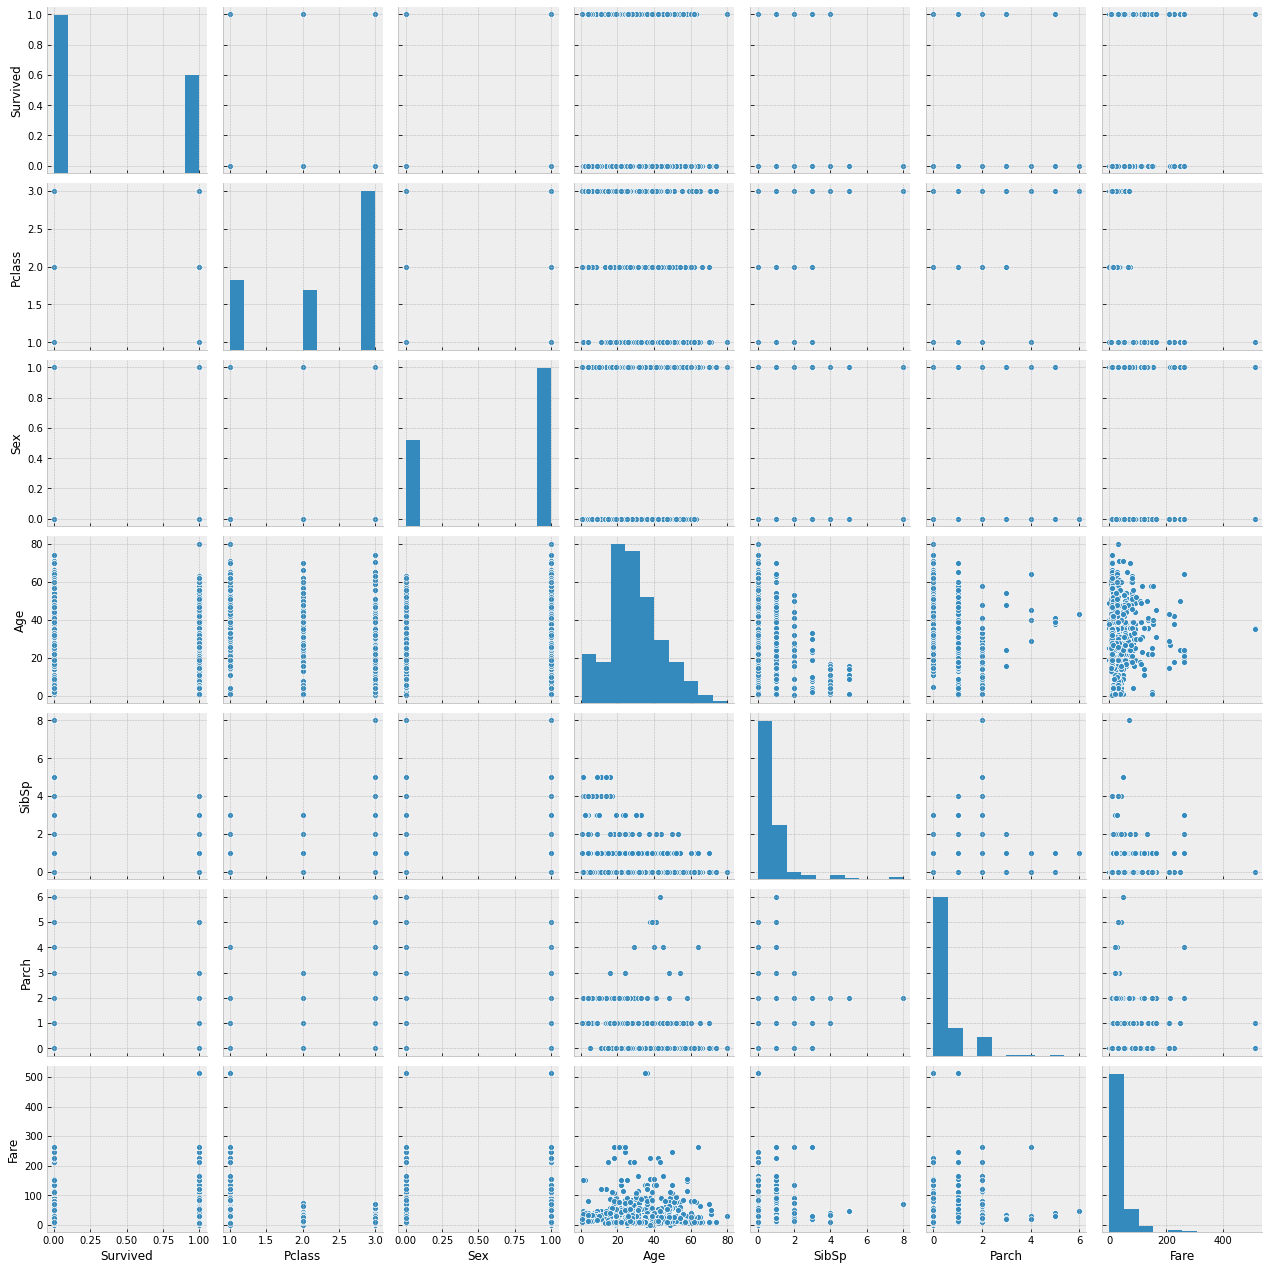

In [146]:
#Plot a pair plot
sns.pairplot(train)


In [147]:
#check number of survivors based on sex
sex = train.groupby('Sex').count()['Survived'].reset_index(False).sort_values(by='Sex', ascending=False)

sex.style.background_gradient(cmap='Accent')

,Sex,Survived
1,1,577
0,0,314


In [148]:
#check on class

Pclass = train.groupby('Pclass').count()['Survived'].reset_index(False).sort_values(by='Pclass', ascending=False)
Pclass.style.background_gradient(cmap='Accent')

,Pclass,Survived
2,3,491
1,2,184
0,1,216


In [ ]:
# Data Reduction


## 7. Implementing the Solution

In [149]:
# Implementing the Solution
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(clf, param_grid= {'n_neighbors': np.arange(1,30, 2)}, n_jobs= 1, refit=True, cv = 5)

In [150]:
train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [163]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [164]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [167]:
train.dropna(inplace=True)

In [168]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [169]:
X = train[['Age', 'SibSp', 'Parch', 'Fare']]
y = train['Survived']

In [173]:
#Splitting the dataset
X = train[['Age', 'SibSp', 'Parch', 'Fare']]
y = train['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)
print(y_pred)

compare= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

compare.describe()


[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0]


,Actual,Predicted
count,143.000000,143.000000
mean,0.384615,0.335664
std,0.488214,0.473882
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [172]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[72 20]
 [17 34]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80        92
           1       0.63      0.67      0.65        51

    accuracy                           0.74       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.75      0.74      0.74       143



## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

We did have the right data

### b). Do we need other data to answer our question?

No

### c). Did we have the right question?

Teh right questions were asked and answered.